In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
savedir = "saved_models/clean_nonpersistent/"

In [175]:
training_samples = np.load(savedir + "training_samples.npy")
final_samples = np.load(savedir + "final_samples.npy")
variables = np.load(savedir + "variables.npy")

### Look at the trained weights

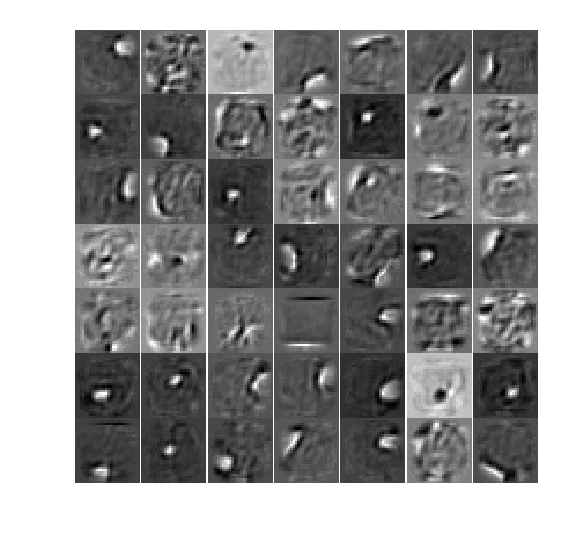

In [176]:
s=7
fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
for ii in range(s):
    for jj in range(s):
        ax = axes[ii,jj]
        w=np.reshape(variables[-1]['weights'][:,ii*s + jj], (28,28))
        ax.imshow(w, cmap='binary')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(savedir+"weights_examples.png")

## Look at samples produced by the trained model, when seeded by the dataset

In [177]:
images = np.reshape(final_samples, (-1, 28,28))

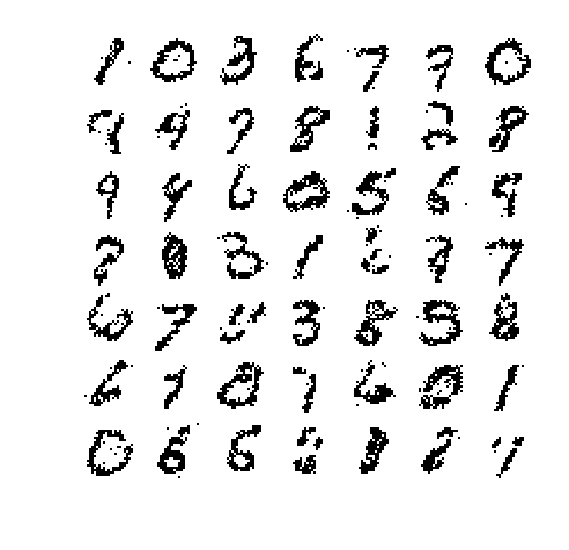

In [178]:
s=7
fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
for ii in range(s):
    for jj in range(s):
        ax = axes[ii,jj]
        image=images[ii*s + jj,...]
        ax.imshow(image, cmap='binary')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(savedir+"trained_samples_examples.png")